In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

In [2]:
FPATH = "./demographic_data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2017_release.csv"
df = pd.read_csv(FPATH)
print(df.shape)
df = df[df['StateAbbr'] == 'MI']
print(f"MI Cities: {df.shape}")
df = df[df['PlaceName'] == 'Ann Arbor']
print(f"Ann Arbor tracts: {df.shape}")
df['TRACT'] = df['TractFIPS'].astype(str).str[-6:]
df.head()

(27210, 63)
MI Cities: (724, 63)
Ann Arbor tracts: (33, 63)


,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,population_count,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,TRACT
13525,MI,Ann Arbor,2603000,26161400100,2603000-26161400100,1755,12.8,"(10.2, 16.6)",11.3,"(10.6, 11.9)",...,7.9,"( 6.8, 9.1)",32.9,"(30.1, 35.4)",1.5,"( 1.4, 1.7)",14.2,"(10.1, 19.2)","(42.28010295770, -83.7462540302)",400100
13526,MI,Ann Arbor,2603000,26161400200,2603000-26161400200,7098,14.1,"(11.8, 16.2)",4.3,"( 3.8, 4.7)",...,6.1,"( 5.2, 6.7)",31.3,"(28.7, 33.3)",0.4,"( 0.4, 0.5)",11.9,"( 8.7, 14.6)","(42.28154505960, -83.7324117791)",400200
13527,MI,Ann Arbor,2603000,26161400300,2603000-26161400300,6222,19.1,"(14.6, 26.1)",6.5,"( 5.6, 7.3)",...,8.8,"( 7.0, 10.9)",33.9,"(29.6, 37.2)",0.9,"( 0.7, 1.0)",20.3,"(15.7, 25.9)","(42.27454257450, -83.7303535678)",400300
13528,MI,Ann Arbor,2603000,26161400400,2603000-26161400400,3045,7.4,"( 6.2, 9.0)",19.2,"(18.2, 20.3)",...,8.4,"( 7.5, 9.3)",29.0,"(27.2, 30.9)",1.9,"( 1.7, 2.1)",7.3,"( 5.0, 9.9)","(42.26482251930, -83.7310920606)",400400
13529,MI,Ann Arbor,2603000,26161400500,2603000-26161400500,6088,18.8,"(13.1, 25.7)",7.3,"( 6.5, 8.2)",...,9.2,"( 7.1, 11.4)",33.5,"(29.3, 36.8)",1.0,"( 0.8, 1.1)",19.7,"(15.0, 25.7)","(42.27079011250, -83.7420214807)",400500


In [3]:
image_data = pd.read_csv("CLEAN_DATA.csv")
print(image_data.shape)
image_data['TRACT'] = image_data['TRACT'].astype(str)
print(image_data.columns)
image_data.head()

(5964, 40)
Index(['Unnamed: 0', 'file', 'county_x', 'labels', 'label_scores', 'colors',
       'color_pixel_fraction', 'color_scores', 'chunk', 'chunk_index',
       'image_index', 'latitiude', 'longitude', 'projection', 'resolution',
       'metadata', 'county_y', 'window_size', 'chunk_file', 'GEOID', 'CENTLAT',
       'AREAWATER', 'STATE', 'BASENAME', 'OID', 'LSADC', 'FUNCSTAT',
       'INTPTLAT', 'NAME', 'OBJECTID', 'TRACT', 'CENTLON', 'AREALAND',
       'INTPTLON', 'MTFCC', 'COUNTY', 'CENT', 'INTPT', 'Census_Benchmark',
       'Census_Vintage'],
      dtype='object')


,Unnamed: 0,file,county_x,labels,label_scores,colors,color_pixel_fraction,color_scores,chunk,chunk_index,...,TRACT,CENTLON,AREALAND,INTPTLON,MTFCC,COUNTY,CENT,INTPT,Census_Benchmark,Census_Vintage
0,0,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,0,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
1,1,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,1,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
2,2,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,10,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
3,3,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,100,...,733601,-83.980353,30603912,-83.980535,G5020,93,"(-83.9803529, 42.4429685)","(-83.980535, 42.4443155)",Public_AR_Current,ACS2015_Current
4,4,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,101,...,733601,-83.980353,30603912,-83.980535,G5020,93,"(-83.9803529, 42.4429685)","(-83.980535, 42.4443155)",Public_AR_Current,ACS2015_Current


In [4]:
tract_matches = [x for x in df['TRACT'].to_list() if x in image_data['TRACT'].to_list()]
print(len(tract_matches))

# reduce images to the those that occurs in
# one of the 33 Ann Arbor census tracts
image_data_subset = image_data[image_data['TRACT'].isin(tract_matches)]
print(image_data_subset.shape)
image_data_subset.head(2)

33
(208, 40)


,Unnamed: 0,file,county_x,labels,label_scores,colors,color_pixel_fraction,color_scores,chunk,chunk_index,...,TRACT,CENTLON,AREALAND,INTPTLON,MTFCC,COUNTY,CENT,INTPT,Census_Benchmark,Census_Vintage
1892,1892,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['Property', 'Land lot', 'Soil', 'Landscape', ...","[0.8992060422897339, 0.7105153799057007, 0.637...","[(92, 82, 62), (31, 35, 24), (62, 54, 37), (24...","[0.25706666707992554, 0.018977778032422066, 0....","[0.5063297152519226, 0.04618037864565849, 0.20...",2,903,...,403800,-83.731929,3502562,-83.730786,G5020,161,"(-83.7319285, 42.3092008)","(-83.7307865, 42.3117286)",Public_AR_Current,ACS2015_Current
1893,1893,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['Architecture', 'Land lot', 'Photography', 'A...","[0.7263345718383789, 0.6915314793586731, 0.677...","[(91, 81, 60), (64, 56, 37), (244, 242, 233), ...","[0.20822222530841827, 0.14244444668293, 0.4293...","[0.4144649803638458, 0.2815038859844208, 0.002...",2,904,...,403600,-83.716531,3555347,-83.714729,G5020,161,"(-83.7165312, 42.3113124)","(-83.7147291, 42.3120974)",Public_AR_Current,ACS2015_Current


In [5]:
"""
The test for TRACT 403800 shows that centroid lat and lon are off by a few hundred feet, but that the tract is correct.
"""

test = df[df['TRACT']=='403800']
test

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,population_count,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,TRACT
13545,MI,Ann Arbor,2603000,26161403800,2603000-26161403800,2902,9.5,"( 8.0, 11.5)",20.1,"(19.3, 21.1)",...,9.3,"( 8.4, 10.4)",33.8,"(32.3, 35.2)",2.3,"( 2.1, 2.6)",9.6,"( 6.4, 13.6)","(42.30830063720, -83.7313866299)",403800


In [6]:
# get a list of crude prevalances
cols = [x for x in df.columns if 'CrudePrev' in x]


# build a dictionary for the highest
# and lowest condition prevalance by census tract
polar_tracts_by_condition = {}

for condition in cols:
    min_max = {
        'minTract': df[df[condition] == df[condition].min()]['TRACT'].values[0],
        'maxTract': df[df[condition] == df[condition].max()]['TRACT'].values[0]
    }
    
    polar_tracts_by_condition[condition] = min_max

polar_tracts_by_condition


{'ACCESS2_CrudePrev': {'minTract': '403100', 'maxTract': '400300'},
 'ARTHRITIS_CrudePrev': {'minTract': '400200', 'maxTract': '402300'},
 'BINGE_CrudePrev': {'minTract': '402300', 'maxTract': '400200'},
 'BPHIGH_CrudePrev': {'minTract': '400200', 'maxTract': '402300'},
 'BPMED_CrudePrev': {'minTract': '400200', 'maxTract': '402300'},
 'CANCER_CrudePrev': {'minTract': '400200', 'maxTract': '402300'},
 'CASTHMA_CrudePrev': {'minTract': '402500', 'maxTract': '400300'},
 'CHD_CrudePrev': {'minTract': '400200', 'maxTract': '402300'},
 'CHECKUP_CrudePrev': {'minTract': '400500', 'maxTract': '402300'},
 'CHOLSCREEN_CrudePrev': {'minTract': '400300', 'maxTract': '403100'},
 'COLON_SCREEN_CrudePrev': {'minTract': '400500', 'maxTract': '403100'},
 'COPD_CrudePrev': {'minTract': '402600', 'maxTract': '405100'},
 'COREM_CrudePrev': {'minTract': '400500', 'maxTract': '405300'},
 'COREW_CrudePrev': {'minTract': '400300', 'maxTract': '403100'},
 'CSMOKING_CrudePrev': {'minTract': '402300', 'maxTract

In [7]:
def flatten(_list):
    return [item for sublist in _list for item in sublist]

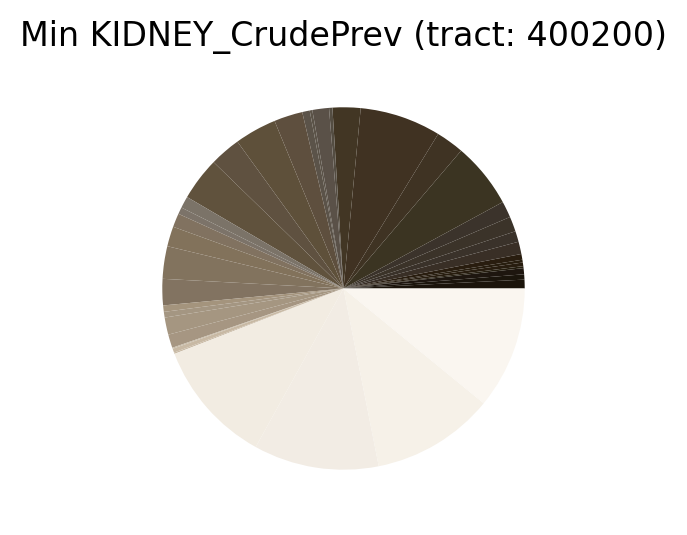

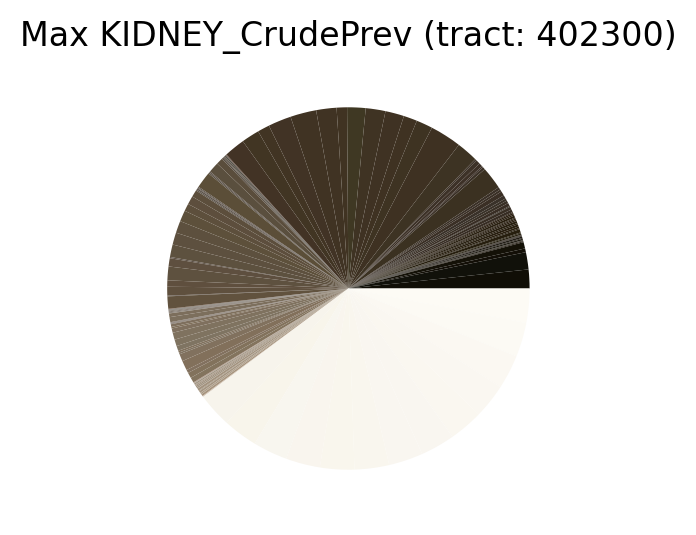

In [10]:
CONDITION = 'KIDNEY_CrudePrev'

minTract = polar_tracts_by_condition[CONDITION]['minTract']
maxTract = polar_tracts_by_condition[CONDITION]['maxTract']

# subset images tracts with min and max prevalance
minTract_imgs = image_data_subset[image_data_subset['TRACT'] == minTract]
maxTract_imgs = image_data_subset[image_data_subset['TRACT'] == maxTract]

def plot_color_aggregate_color_wheel(dataframe_subset, fig_title):
    # build dataframe of colors from the minimum prevalance tract
    fractions = flatten([ast.literal_eval(x) for x in dataframe_subset['color_pixel_fraction'].to_list()])
    colors = flatten([ast.literal_eval(x) for x in dataframe_subset['colors'].to_list()])
    normed_colors = [tuple(np.array(x).astype(float) / 255.0) for x in colors]

    color_fractions = pd.DataFrame(
        {'fractions': fractions,
        'color': colors,
        'normed_color': normed_colors
        })

    color_fractions['total_fraction'] = color_fractions['fractions']/color_fractions['fractions'].sum()
    color_fractions = color_fractions.sort_values(by='color')

    # plot minimum prevalance tract color wheel
    fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
    plt.title(fig_title)
    pie = ax.pie(color_fractions['total_fraction'], colors=color_fractions['normed_color'])



plot_color_aggregate_color_wheel(minTract_imgs, f'Min {CONDITION} (tract: {minTract})')
plot_color_aggregate_color_wheel(maxTract_imgs, f'Max {CONDITION} (tract: {maxTract})')

In [9]:
image_data_subset.columns

Index(['Unnamed: 0', 'file', 'county_x', 'labels', 'label_scores', 'colors',
       'color_pixel_fraction', 'color_scores', 'chunk', 'chunk_index',
       'image_index', 'latitiude', 'longitude', 'projection', 'resolution',
       'metadata', 'county_y', 'window_size', 'chunk_file', 'GEOID', 'CENTLAT',
       'AREAWATER', 'STATE', 'BASENAME', 'OID', 'LSADC', 'FUNCSTAT',
       'INTPTLAT', 'NAME', 'OBJECTID', 'TRACT', 'CENTLON', 'AREALAND',
       'INTPTLON', 'MTFCC', 'COUNTY', 'CENT', 'INTPT', 'Census_Benchmark',
       'Census_Vintage'],
      dtype='object')